In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import make_axes
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

import os, glob

from libraries.read_lib import read_pgm

%load_ext autoreload
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%autoreload 2

In [4]:
source = os.path.realpath('../data/samples/')
print(source)

/var/abs/local/camera/data/samples


In [5]:
filelist = glob.glob(source + '/test*.ppm')
filelist.sort()
headlist = []
imlist = []
for file in filelist[-4:]:
    print(file)
    h, im = read_pgm(file)
    headlist.append(h)
    imlist.append(im)

#for f in glob.glob(source+'test*'):
#    os.remove(f)

/var/abs/local/camera/data/samples/test-0000000000.ppm
/var/abs/local/camera/data/samples/test-0000000001.ppm
/var/abs/local/camera/data/samples/test-0000000002.ppm
/var/abs/local/camera/data/samples/test-0000000003.ppm


In [6]:
im

array([[  0,   0,   0, ...,   0,  12,   4],
       [ 36,  56,  20, ...,  44,   0,   0],
       [  0,  12,  16, ...,  52,   4,   0],
       ..., 
       [  0,   0,   0, ..., 136,   0,  92],
       [ 36,  80,  16, ...,  88,   0, 200],
       [  0,  48,  44, ..., 176, 112,   0]], dtype=uint16)

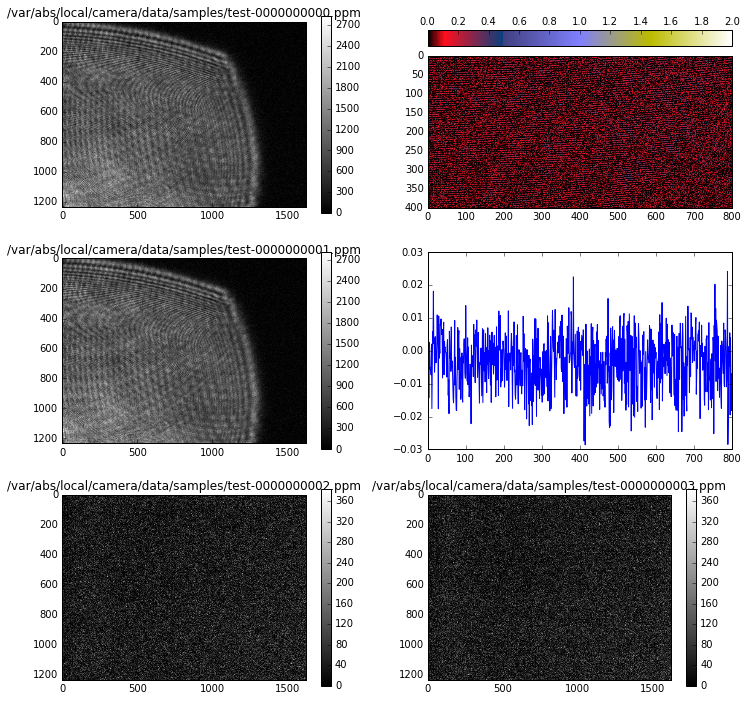

In [20]:
nrows, ncols = 3, 2
fig = plt.figure(figsize = (6*ncols,4*nrows))
gs = GridSpec(nrows, ncols, )
axes = [plt.subplot(gs[j,0]) for j in range(nrows)] + [plt.subplot(gs[-1,1])]

ax0 = plt.subplot(gs[0,1])
ax1 = plt.subplot(gs[1,1])

for j, (ax, im) in enumerate(zip(axes, imlist)):
    i = ax.imshow(im, cmap='gray',)
    cax, kw = make_axes(ax)
    ax.set_title(filelist[j])
    plt.colorbar(i, cax, **kw)
    
atoms, ref, b1, b2 = imlist
od_crop = (slice(800,1200), slice(200,1000))

#OD = -np.log((atoms[od_crop]-b1[od_crop])/(ref[od_crop]-b2[od_crop]+1))
OD = -np.log((atoms[od_crop])/(ref[od_crop]))

i2 = ax0.imshow(OD, cmap='gist_stern', vmin=0, vmax=2)
cax, kw = make_axes(ax0, 'top')
plt.colorbar(i2, cax=cax, **kw)

ax1.plot(OD.mean(0))

In [8]:
OD

array([[-0.36290549, -0.14152302, -0.18442904, ..., -0.05628084,
         0.43223535, -0.20653581],
       [-0.0764417 ,  0.13410993, -0.147636  , ...,  0.2642618 ,
         0.00873368,  0.57022034],
       [ 0.02105341,  0.29015426,  0.16444943, ...,  0.09389609,
         0.24640041, -0.07191258],
       ..., 
       [-0.00988476,  0.00766287, -0.0038241 , ...,  0.12656272,
         0.19189101, -0.06230388],
       [ 0.03577617,  0.1034131 ,  0.02941389, ...,  0.31149272,
        -0.03218669, -0.16003651],
       [ 0.02702867, -0.20370906,  0.13036182, ..., -0.03309995,
         0.09452617, -0.05994304]])

In [9]:
OD.max()

1.3285355269676982

In [10]:
OD.min()

-1.3411739258394211

In [13]:
#b = ((2**16/OD.max()) * (OD + abs(OD.min())) )
#b = (OD + abs(OD.min())) * 6553.6 + 1
b = OD * 6553.6

In [14]:
b[b<0] = 0

In [15]:
b.min()

0.0

In [16]:
b.max()

8706.6904295355071

In [17]:
c = b.astype(np.uint16)

In [18]:
c

array([[   0,    0,    0, ...,    0, 2832,    0],
       [   0,  878,    0, ..., 1731,   57, 3736],
       [ 137, 1901, 1077, ...,  615, 1614,    0],
       ..., 
       [   0,   50,    0, ...,  829, 1257,    0],
       [ 234,  677,  192, ..., 2041,    0,    0],
       [ 177,    0,  854, ...,    0,  619,    0]], dtype=uint16)